In [1]:
from glob import glob
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import eigencharacter as ec
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
h100_dir = ec.get_exp_dir('MF_Model', 'h100')
h200_dir = ec.get_exp_dir('MF_Model', 'h200')

In [3]:
def extract_test_loss(exp_path):
    files = glob(str(exp_path / "events*"))
    assert len(files) == 1
    ev_acc = EventAccumulator(files[0])
    ev_acc.Reload()
    test_loss = [(exp_path.name, x.step, x.value) for x in ev_acc.Scalars('test/loss')]
    return test_loss

In [4]:
def concat_runs(exp_dir):
    loss_dfs = []
    for exp_path in exp_dir.iterdir():    
        df = pd.DataFrame.from_records(extract_test_loss(exp_path), columns=["exp_name", "epoch", "loss"])
        loss_dfs.append(df)
    loss_concat = pd.concat(loss_dfs)
    loss_concat["form"] = loss_concat.exp_name.apply(lambda x: x[3:6])
    loss_concat["form_dim"] = loss_concat.exp_name.apply(lambda x: int(x[7:10]))
    loss_concat["task"] = loss_concat.exp_name.apply(lambda x: x[:2])
    loss_concat["hidden_dim"] = exp_dir.name
    return loss_concat
h100_loss = concat_runs(h100_dir)
h200_loss = concat_runs(h200_dir)
loss_df = pd.concat([h100_loss, h200_loss])

In [5]:
loss_df

,exp_name,epoch,loss,form,form_dim,task,hidden_dim
0,fm_svd_010,1,0.000166,svd,10,fm,h100
1,fm_svd_010,2,0.000100,svd,10,fm,h100
2,fm_svd_010,3,0.000064,svd,10,fm,h100
3,fm_svd_010,4,0.000043,svd,10,fm,h100
4,fm_svd_010,5,0.000031,svd,10,fm,h100
...,...,...,...,...,...,...,...
15,mf_vae_100_h200,16,0.000463,vae,100,mf,h200
16,mf_vae_100_h200,17,0.000463,vae,100,mf,h200
17,mf_vae_100_h200,18,0.000462,vae,100,mf,h200
18,mf_vae_100_h200,19,0.000462,vae,100,mf,h200


In [6]:
import seaborn as sns

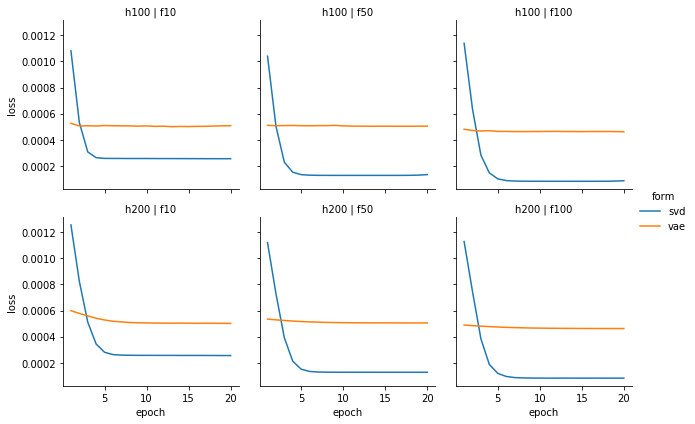

In [12]:
g = sns.FacetGrid(loss_df.loc[loss_df.task=='mf', ], col='form_dim', row='hidden_dim', hue='form')
g = g.map(plt.plot, "epoch", "loss", linestyle='-')\
    .add_legend()\
    .set_titles("{row_name} | f{col_name}")
g.savefig("mf_plot.png", dpi=300)

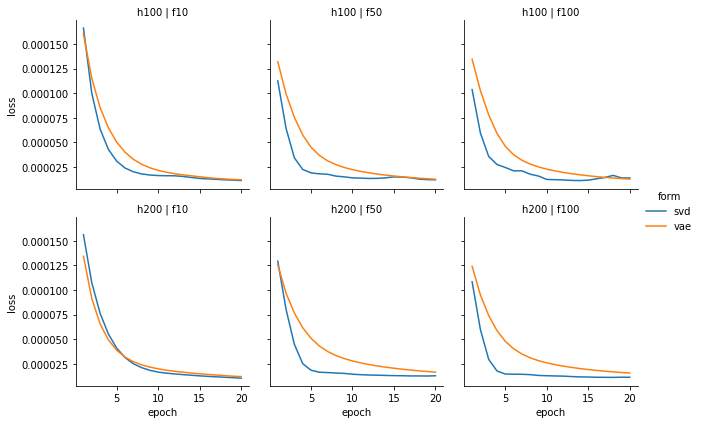

In [11]:
g = sns.FacetGrid(loss_df.loc[loss_df.task=='fm', ], col='form_dim', row='hidden_dim', hue='form')
g = g.map(plt.plot, "epoch", "loss", linestyle='-')\
    .add_legend()\
    .set_titles("{row_name} | f{col_name}")
g.savefig("fm_plot.png", dpi=300)